### **California Housing Price Prediction**

The following contains both a Random Froest Regressor and a Support Vector Machine to predict the base price of homes in California. The prediction used features include number of bedrooms, location (latitude and longitude), number of bathrooms, square footage, and more. Both models were built using the user guides from scikit-learn.org.

In addition to predicting the base price, we have a renovation calculator that...


**References for our data, models, and features:**

Primary Data Set: https://scikit-learn.org/1.5/datasets/real_world.html

Random Forest Regressor: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor

Choosing our evaluation metrics: https://www.geeksforgeeks.org/regression-metrics/

Evaluation Metrics:
    
1. MAE: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error

2. RMSE: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.root_mean_squared_error.html#sklearn.metrics.root_mean_squared_error

3. R2: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

Support Vector Regressor: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

Renovation Calculator Data:
1. https://www.ramseysolutions.com/real-estate/home-renovations?srsltid=AfmBOor1tLz3i0joUMQC1Z7JThpmZFTUQ_Mx_fdiTxnyEiRzvWxJsPys
2. https://www.bankrate.com/homeownership/home-renovations-that-return-the-most-at-resale/#best-home-renovations

Rental Calculator Data:
Assist to manipulate data: https://saturncloud.io/blog/how-to-create-new-values-in-a-pandas-dataframe-column-based-on-values-from-another-column/#:~:text=To%20create%20the%20new%20column,and%20returns%20the%20corresponding%20category.

Rent data obtained:https://www.rentdata.org/states/california/2006#google_vignette

Longitude/Latitude- https://www.latlong.net/



In [ ]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#classes and models
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  
---------------------
Mean CV Score: {0.8063561538502245}
---------------------
[0.493178   0.74159    4.87801084 ... 4.81367084 0.710044   1.685162  ]
---------------------
Root Mean Squared Error: {0.5020310770739131}
Mean Absolute Error: {0.32582848840116263}
R² Score: {0.8076667616499951}
---------------------


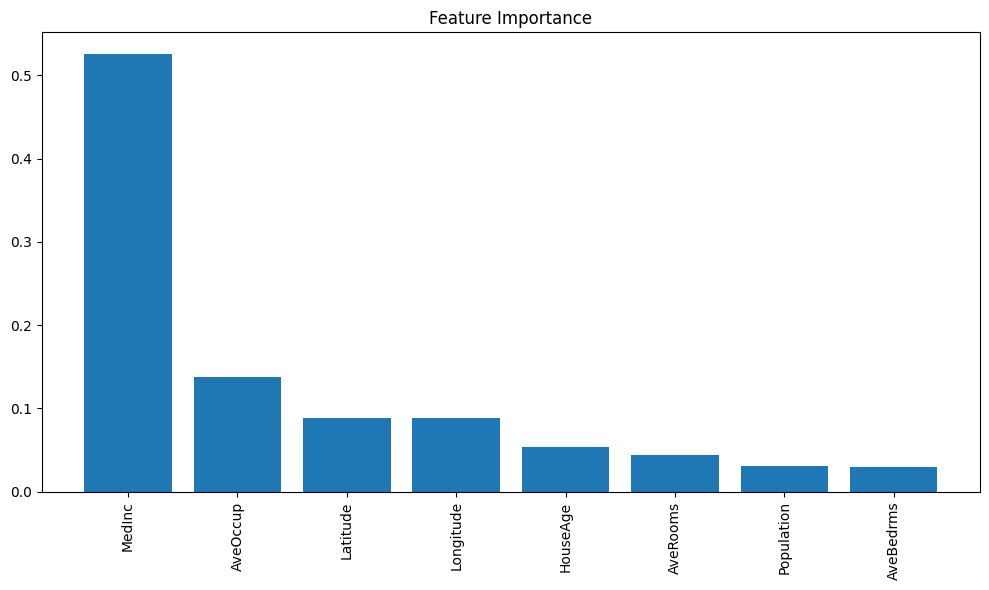

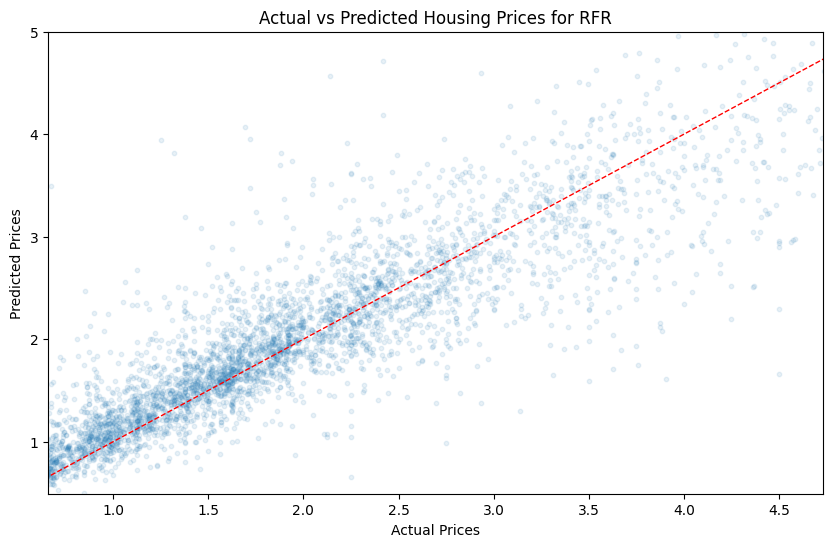

In [ ]:
#-----------PART 1: Random Forest Regressor-------------

#import the initial data
california_housing = fetch_california_housing()

#convert to a pandas dataframe
housing = pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)
housing['Target'] = california_housing.target #add the target values array to the main dataset

#view the dataset
print(housing.head(5))
print('---------------------')

#define the x and y variables
x = housing.iloc[:, :-1]
y = housing.iloc[:, -1]

#define the training vs. testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#set rs to 42 for consistency

#scale the data
rfr_scaler = StandardScaler()
x_train = rfr_scaler.fit_transform(x_train)
x_test = rfr_scaler.transform(x_test)

#initialize the model
rfr_model = RandomForestRegressor(n_estimators=500, random_state=42)

#use a cross-validator
cv_scores = cross_val_score(rfr_model, x_train, y_train, cv=5, scoring='r2')
print("Mean CV Score:", {np.mean(cv_scores)})
print('---------------------')

#train the model
rfr_model.fit(x_train, y_train)

#make predictions on the test set
y_pred = rfr_model.predict(x_test)
print(y_pred)
print('---------------------')

#evaluate the model's performance
rfr_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rfr_mae = mean_absolute_error(y_test, y_pred)
rfr_r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error:", {rfr_rmse})
print("Mean Absolute Error:", {rfr_mae})
print("R² Score:", {rfr_r2})
print('---------------------')

#view each feature's importance
importance = rfr_model.feature_importances_
indices = np.argsort(importance)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(x_train.shape[1]), importance[indices])
plt.xticks(range(x_train.shape[1]), housing.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

#visualize the model's performance
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.1, marker='o', s=10)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=1)
plt.xlim([y_test.quantile(0.05), y_test.quantile(0.95)])
plt.ylim([y_pred.min(), y_pred.max()])
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Housing Prices for RFR")
plt.show()

[-1.11048195 -0.46597144  0.19910082 ...  1.57907582 -0.51271055
 -0.40114807]
---------------------
Root Mean Squared Error: {0.8016091203822034}
Mean Absolute Error: {0.5611008082690436}
R² Score: {0.509636157451753}
---------------------


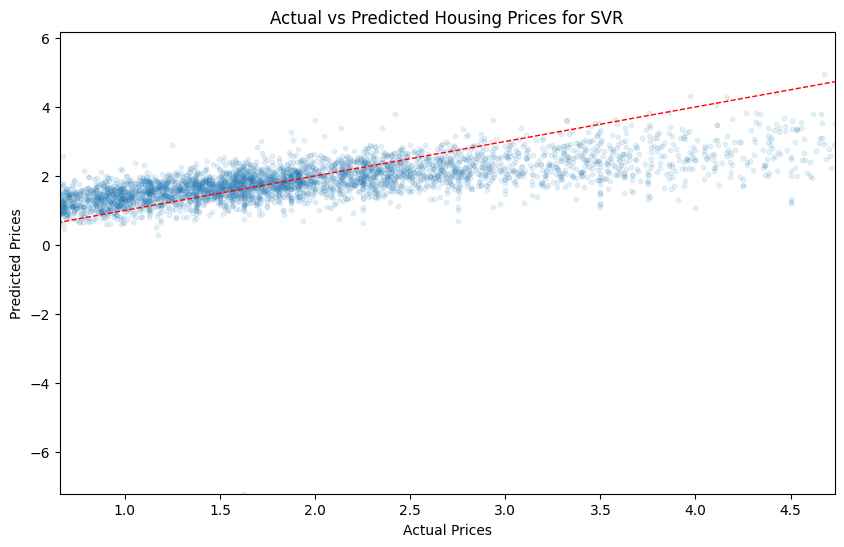

In [ ]:
#____________PART 2: Support Vector Regressor_________________

from sklearn.svm import SVR

#import the initial data
california_housing = fetch_california_housing()

#convert to a pandas dataframe
housing = pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)
housing['Target'] = california_housing.target

#define the x and y variables
x = housing.iloc[:, :-1]
y = housing.iloc[:, -1]

#define the training vs. testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#scale the target variable
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

#define the SVR model
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)
svr_model.fit(x_train, y_train_scaled)

#predict the test set
y_pred_svr_scaled = svr_model.predict(x_test)
print(y_pred_svr_scaled)
print('---------------------')

#inverse transform the predictions and actual values to original scale
y_pred_svr = scaler_y.inverse_transform(y_pred_svr_scaled.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

#evaluate the model's performance
svr_rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_svr))
svr_mae = mean_absolute_error(y_test_original, y_pred_svr)
svr_r2 = r2_score(y_test_original, y_pred_svr)

print("Root Mean Squared Error:", {svr_rmse})
print("Mean Absolute Error:", {svr_mae})
print("R² Score:", {svr_r2})
print('---------------------')

#view the model's performance
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred_svr, alpha=0.1, marker='o', s=10)
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], '--r', linewidth=1)
plt.xlim([np.quantile(y_test_original, 0.05), np.quantile(y_test_original, 0.95)])
plt.ylim([np.min(y_pred_svr), np.max(y_pred_svr)])
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Housing Prices for SVR")
plt.show()

In [ ]:
#___________Part 3: User Input for Base House Price Prediction____________

#define the user input function
def predict_house_price():
    print("Please provide the following details about the house:")
    try:
        features = []
        features.append(float(input("MedInc (Median income in block): ")))
        features.append(float(input("HouseAge (Median age of houses in block): ")))
        features.append(float(input("AveRooms (Average number of rooms per house): ")))
        features.append(float(input("AveOccup (Average number of people per household): ")))
        features.append(float(input("Latitude (Latitude of the house): ")))
        features.append(float(input("Longitude (Longitude of the house): ")))
        features.append(float(input("AveBedrms (Average number of bedrooms per house): ")))
        features.append(float(input("Population (Population of the block): ")))
        print('----------')

        #convert the input to a pandas dataframe
        feature_names = california_housing.feature_names
        features_df = pd.DataFrame([features], columns=feature_names)

        #scale features for RFR
        features_scaled = rfr_scaler.transform(features_df)

        #make predictions using the trained models
        predicted_price_rfr = rfr_model.predict(features_scaled)
        print(f"RFR Predicted House Price: ${predicted_price_rfr[0] * 1000000:.2f}")
        print('----------')

        predicted_price_svr = svr_model.predict(features_df)
        #inverse transform the SVR prediction to the original scale
        predicted_price_svr_original = scaler_y.inverse_transform(predicted_price_svr.reshape(-1, 1)
                                                                  ).flatten()[0]
        print(f"SVR Predicted House Price: ${predicted_price_svr_original * 1000000:.2f}")

    except ValueError:
        print("Invalid input. Please enter numeric values where appropriate.")

#call the function
predict_house_price()

Please provide the following details about the house:
MedInc (Median income in block): 80
HouseAge (Median age of houses in block): 15
AveRooms (Average number of rooms per house): 5
AveOccup (Average number of people per household): 4
Latitude (Latitude of the house): 30
Longitude (Longitude of the house): -120
AveBedrms (Average number of bedrooms per house): 4
Population (Population of the block): 180000
----------
RFR Predicted House Price: $2800311.44
----------
SVR Predicted House Price: $3252260.27


In [ ]:
#___________Part 4: Renovation Calculator with User Input____________

def predict_house_price():
    print("Please provide the following details about the house:")
    try:
        features = []
        features.append(float(input("MedInc (Median income in block): ")))
        features.append(float(input("HouseAge (Median age of houses in block): ")))
        features.append(float(input("AveRooms (Average number of rooms per house): ")))
        features.append(float(input("AveOccup (Average number of people per household): ")))
        features.append(float(input("Latitude (Latitude of the house): ")))
        features.append(float(input("Longitude (Longitude of the house): ")))
        features.append(float(input("AveBedrms (Average number of bedrooms per house): ")))
        features.append(float(input("Population (Population of the block): ")))
        print('----------')

        # Convert the input to a DataFrame for processing
        feature_names = california_housing.feature_names
        features_df = pd.DataFrame([features], columns=feature_names)
        features_scaled = rfr_scaler.transform(features_df)

        # Make predictions using the trained models
        predicted_price_rfr = rfr_model.predict(features_scaled)[0]

        predicted_price_svr = svr_model.predict(features_df)
        #inverse transform the SVR prediction to the original scale
        predicted_price_svr_original = scaler_y.inverse_transform(predicted_price_svr.reshape(-1, 1)
                                                                  ).flatten()[0]
        print(f"RFR Predicted House Price: ${predicted_price_rfr * 1000000:.2f}")
        print(f"SVR Predicted House Price: ${predicted_price_svr_original * 1000000:.2f}")
        print('----------')

        return predicted_price_rfr, predicted_price_svr_original
    except Exception as e:
        print(f"An error occurred: {e}")
        return None, None  #ensure returning a tuple in case of any error


#define the renovation data
renovation_data = pd.DataFrame({
    "Renovation Type": ["Flooring", "Flooring", "Flooring", "Flooring",
                        "Interior Paint", "Interior Paint", "Interior Paint",
                        "Exterior Paint", "Exterior Paint", "Exterior Paint",
                        "Kitchen Remodel", "Kitchen Remodel",
                        "Bathroom Remodel", "Bathroom Remodel",
                        "Master Bath Renovation", "Master Bath Renovation",
                        "Landscaping", "Landscaping",
                        "Roof Replacement", "Roof Replacement",
                        "New Windows", "New Windows",
                        "Basement Finishing", "Basement Finishing",
                        "Energy-Efficient Upgrades", "Energy-Efficient Upgrades",
                        "Deck Addition", "Deck Addition",
                        "Garage Door Replacement", "Garage Door Replacement",
                        "Attic Insulation", "Attic Insulation",
                        "Minor Repairs", "Minor Repairs"],
    "Detail": ["Hardwood", "Laminate", "Tile", "Carpet",
              "Neutral Colors", "Bold Colors", "Light Colors",
              "White", "Dark Colors", "Earthy Tones",
              "Minor", "Major",
              "Basic", "Luxury Upgrade",
              "Spa-Like Features", "Standard Upgrade",
              "Low Maintenance", "High-End",
              "Asphalt Shingles", "Metal Roofing",
              "Energy-Efficient", "Standard",
              "Basic", "Entertainment Area",
              "Solar Panels", "Insulation",
              "Wood Deck", "Composite Deck",
              "Standard", "Insulated",
              "Fiberglass", "Spray Foam",
              "Plumbing Fixes", "Electrical Fixes"],
    "Value Increase (%)": [12, 7, 8, 5,
                          5, 4, 5.2,
                          5.2, 4.8, 5.0,
                          10, 20,
                          8, 15,
                          25, 15,
                          6, 9,
                          7, 10,
                          9, 6,
                          10, 15,
                          12, 6,
                          8, 10,
                          3, 4,
                          3.2, 4.5,
                          2.5, 3.0]})

def predict_house_price_with_renovations():
    predicted_price_rfr, predicted_price_svr = predict_house_price()
    if predicted_price_rfr is None or predicted_price_svr is None:
        print("Error retrieving house prices. Please ensure all inputs are correct.")
        return

    #prompt user for renovation details
    renovation_type = input("Enter the type of renovation (e.g., Flooring, Kitchen Remodel): ")
    detail = input("Enter the detail of renovation (e.g., Hardwood, Major): ")

    #find the matching renovation and its value increase
    mask = (renovation_data['Renovation Type'].str.lower() == renovation_type.lower()) & \
           (renovation_data['Detail'].str.lower() == detail.lower())
    if not mask.any():
        print("No matching renovation type and detail found. Please check your inputs and try again.")
        return

    value_increase = renovation_data.loc[mask, 'Value Increase (%)'].values[0]

    #falculate the new price based on renovation for each model's prediction
    new_price_rfr = predicted_price_rfr * (1 + value_increase / 100)
    new_price_svr = predicted_price_svr * (1 + value_increase / 100)

    print('----------')
    print(f"New RFR Predicted House Price with Renovations: ${new_price_rfr * 1000000:.2f}")
    print('----------')
    print(f"New SVR Predicted House Price with Renovations: ${new_price_svr * 1000000:.2f}")

#call the function
predict_house_price_with_renovations()

Please provide the following details about the house:
MedInc (Median income in block): 70
HouseAge (Median age of houses in block): 15
AveRooms (Average number of rooms per house): 5
AveOccup (Average number of people per household): 4
Latitude (Latitude of the house): 30
Longitude (Longitude of the house): -120
AveBedrms (Average number of bedrooms per house): 3
Population (Population of the block): 180
----------
RFR Predicted House Price: $2800311.44
SVR Predicted House Price: $8300277.91
----------
Enter the type of renovation (e.g., Flooring, Kitchen Remodel): Flooring
Enter the detail of renovation (e.g., Hardwood, Major): Hardwood
----------
New RFR Predicted House Price with Renovations: $3136348.81
----------
New SVR Predicted House Price with Renovations: $9296311.26


In [ ]:
rent_data = pd.read_csv('2006 Fair Market Rent In Cali.csv')

def assign_rent(ave_bedrooms):
   if ave_bedrooms < 1:
       return np.mean(rent_data['0 BR'])
   elif 1 <= ave_bedrooms < 2:
       return np.mean(rent_data['1 BR'])
   elif 2 <= ave_bedrooms < 3:
       return np.mean(rent_data['2 BR'])
   elif 3 <= ave_bedrooms < 4:
       return np.mean(rent_data['3 BR'])
   elif 4 <= ave_bedrooms < 5:
       return np.mean(rent_data['4 BR'])
   elif 5 <= ave_bedrooms < 6:
       return np.mean(rent_data['5 BR'])
   elif 6 <= ave_bedrooms < 7:
       return np.mean(rent_data['6 BR'])
   else:
       return np.mean(rent_data['7 BR'])

housing['Rent'] = housing['AveBedrms'].apply(assign_rent)

#define x and y for rent
X_rent = housing.drop(['Rent', 'Target'], axis=1)
y_rent = housing['Rent'] #Focuses our main target to be the rent

x_train_rent, x_test_rent, y_train_rent, y_test_rent = train_test_split(X_rent, y_rent, test_size=0.2, random_state=42)

#scale the data
rfr_rent_scaler = StandardScaler()
x_train_rent = rfr_rent_scaler.fit_transform(x_train_rent)
x_test_rent = rfr_rent_scaler.transform(x_test_rent)

#scale the target variable
rent_target_scaler = StandardScaler()

y_train_rent_scaled = rent_target_scaler.fit_transform(y_train_rent.values.reshape(-1, 1))
y_test_rent_scaled = rent_target_scaler.transform(y_test_rent.values.reshape(-1, 1))

#train the model
rfr_rent_model = RandomForestRegressor(n_estimators=400, random_state=42)
rfr_rent_model.fit(x_train_rent, y_train_rent)

svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)
svr_model.fit(x_train_rent, y_train_rent)


def predict_rent_price():
   print("Please provide the following details about the house:")
   try:
       feature_names = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms',
                       'Population', 'AveOccup', 'Latitude', 'Longitude']

       features = []
       for feature in feature_names:
           value = float(input(f"Enter value for {feature}: "))
           features.append(value)

       print('----------')

       #create df with collected inputs
       features_df = pd.DataFrame([features], columns=feature_names)

       #scale the features
       features_scaled = rfr_rent_scaler.transform(features_df)

       #///
       features_scaled = rfr_scaler.transform(features_df)

       #predict rent with RFR
       predicted_rent_scaled = rfr_rent_model.predict(features_scaled)

       #/////
       predicted_rent_svr = svr_model.predict(features_df)


       #inverse transform predicted rent to original scale
       predicted_rent = rent_target_scaler.inverse_transform(
           predicted_rent_scaled.reshape(-1, 1)
       ).flatten()[0]

       #/////
       predicted_rent_svr_ = scaler_y.inverse_transform(predicted_rent_svr.reshape(-1, 1)
                                                                  ).flatten()[0]


       #prediction
       print(f"RFR Predicted Rent Price: ${round((predicted_rent/100),2)}") #Adjusteds scaling to proper form

       #////
       print(f"SVR Predicted Rent Price: ${round((predicted_rent_svr_),2)}")


   except ValueError as e:
       print(f"Error during prediction: {e}")

#call the function
predict_rent_price()

Please provide the following details about the house:
Enter value for MedInc: 80
Enter value for HouseAge: 20
Enter value for AveRooms: 5
Enter value for AveBedrms: 4
Enter value for Population: 180000
Enter value for AveOccup: 3
Enter value for Latitude: 29
Enter value for Longitude: -121
----------
RFR Predicted Rent Price: $1120.38
SVR Predicted Rent Price: $933.74


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
